## Exploratory Data Analysis (EDA): Second-hand cars
### Imports and reading data

In [54]:
import pandas as pd 
import glob
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('ggplot')


In [63]:
# Read all csv fils in the directory 
files= glob.glob('data/*.csv')

cars_mark= ['audi', 'bmw', 'cclass', 'focus', 'ford', 'hyundi', 'merc', 'skoda', 'toyota', 'vauxhall', 'vw']
dfs_list= []

# Concatenate dataframes
for file, mark in zip(files, cars_mark):
    df= pd.read_csv(file).rename(columns= {'tax(£)': 'tax'})
    df['mark']= mark
    dfs_list.append(df)
df= pd.concat(dfs_list)

# Reset index and display datase shape 
df.reset_index(drop= True, inplace= True)
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,mark
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
108535,Eos,2012,5990,Manual,74000,Diesel,125.0,58.9,2.0,vw
108536,Fox,2008,1799,Manual,88102,Petrol,145.0,46.3,1.2,vw
108537,Fox,2009,1590,Manual,70000,Petrol,200.0,42.0,1.4,vw
108538,Fox,2006,1250,Manual,82704,Petrol,150.0,46.3,1.2,vw


## 1. Description of Individual Variables
### 1.1 Price

In [3]:
df.price.describe()

count    108540.000000
mean      16890.124046
std        9756.266820
min         450.000000
25%       10229.500000
50%       14698.000000
75%       20940.000000
max      159999.000000
Name: price, dtype: float64

In an interpretation of the standard deviation we can tell that our dataset is highly varied in terms of cars pricing that can also be backed up with the large difference between max and min values.

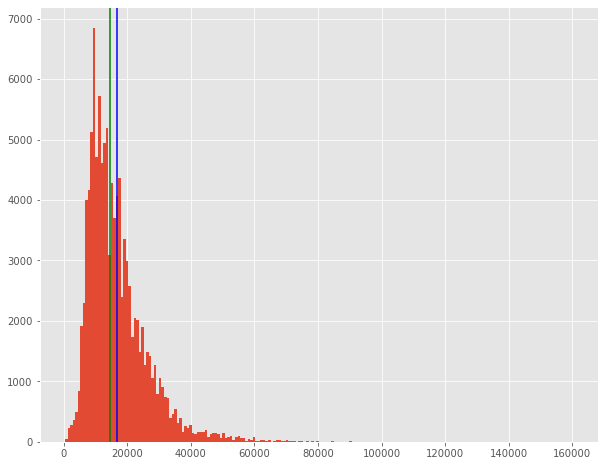

In [23]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df.price, bins= 200)
ax.axvline(df.price.mean(), c= 'blue')
ax.axvline(df.price.median(), c= 'green')

Looking at this histogram we can conclude that cars prics are largely distributed between 5K and 30K.

### 1.2 Vehicle mark and model 

<BarContainer object of 11 artists>

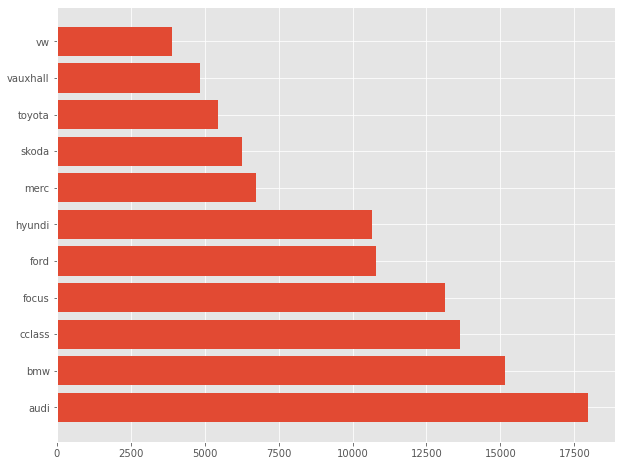

In [25]:
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(df.mark.unique(), df.mark.value_counts())

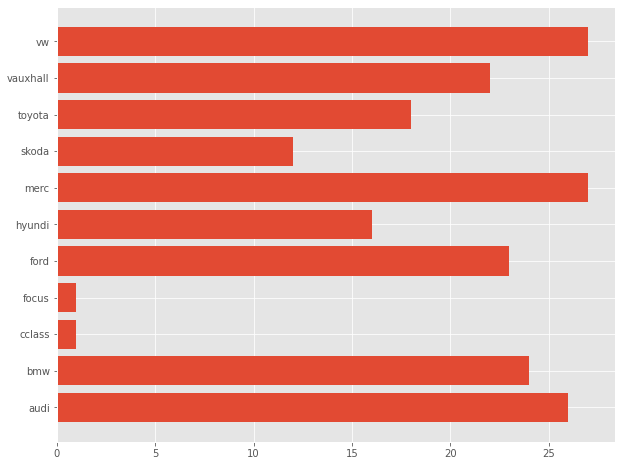

In [53]:
grouped = df.groupby('mark')['model'].nunique()
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(grouped.index, grouped.values)
plt.show()

### 1.3 Year of registration
Looking into the year column which refers to the year of registration which basiccaly means the age of the car. We can see that the maximum car registration is 2060! While the min is resonable. however we still need t tidy up this variable by keeping cars with a year of registration ranging between 1970 (min) and 2023 (current year).

In [57]:
df.year.describe()

count    108540.000000
mean       2017.098028
std           2.130057
min        1970.000000
25%        2016.000000
50%        2017.000000
75%        2019.000000
max        2060.000000
Name: year, dtype: float64

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        2.2000e+01, 1.5900e+02, 9.1500e+02, 8.7430e+03, 9.8697e+04]),
 array([1970., 1975., 1980., 1985., 1990., 1995., 2000., 2005., 2010.,
        2015., 2020.]),
 <BarContainer object of 10 artists>)

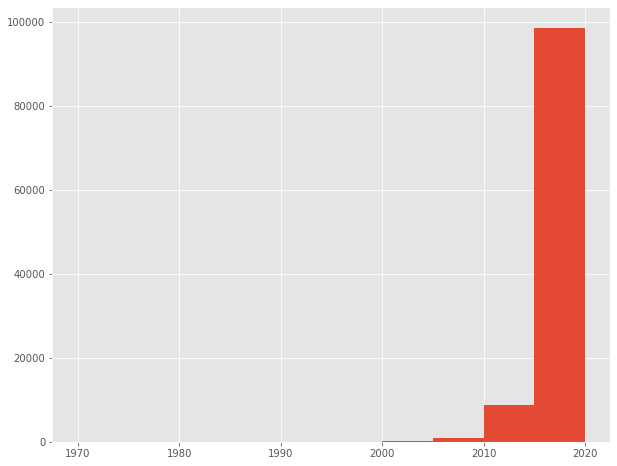

In [74]:
df= df.loc[(df['year'] >= 1970) & (df['year'] <= 2023)]

fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df.year)

It is so clear that the cars we've got here are mainly registered during thr last decades especially 2015-2020 as this period is illustrated by the only peak in the graph

## 1.4 Transmission Type 

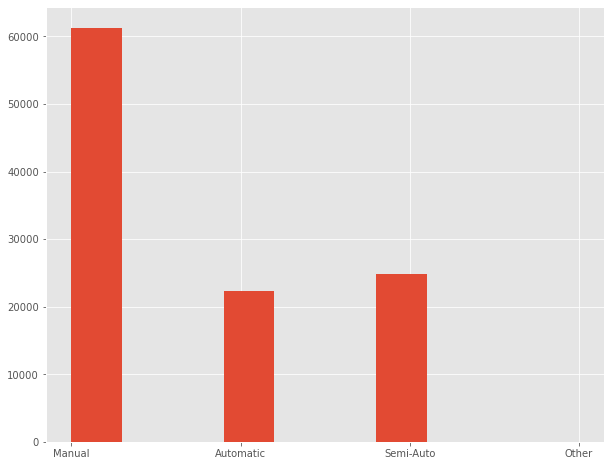

In [88]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df.transmission)
plt.show()

The market is primarily a manual transmission market. Note that Semi-Auto transmission cars are slightly more present then the Automatic ones. 

## 1.5 Mileage

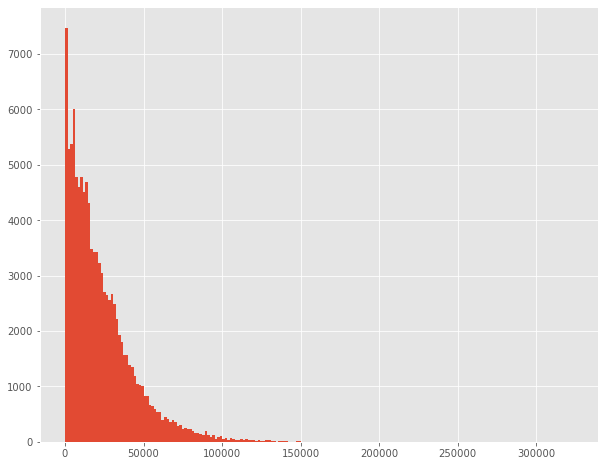

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df.mileage, bins= 200) 
plt.show()

The plot illustrates how mileage is mainly ranged between 0 and 25 0000 KM. The second thind to note is how the peak represent cars with considerably ey low mileage which is not normal when talking about secon-hands cars 

## 1.6 Fuel Type 

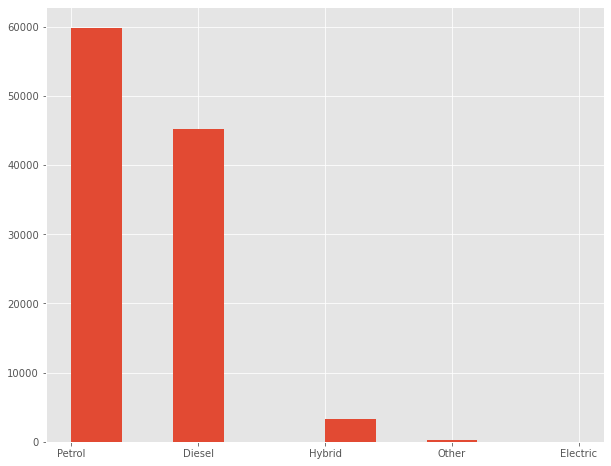

In [91]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df.fuelType) 
plt.show()

## 1.7 Engine Size 

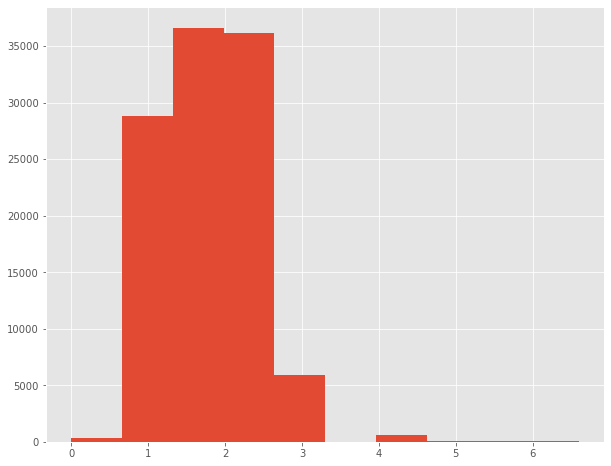

In [98]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df.engineSize) 
plt.show()